<a href="https://colab.research.google.com/github/CodingAW/Project-135/blob/main/Project_133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
u = files.upload()



Saving P132.csv to P132.csv


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv("P132.csv")
print(df.head())

   Unnamed: 0       Star_name    Distance  Mass  Radius     Gravity
0           0             Sun    0.000016   1.0    1.00  274.269161
1           1          Sirius    8.600000   2.1    1.71  196.971800
2           2         Canopus  310.000000  15.0   71.00    0.816115
3           3  Alpha Centauri    4.400000   1.1    1.20  209.511165
4           4        Arcturus   37.000000   1.1   26.00    0.446296


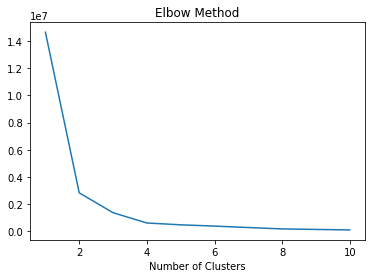

In [ ]:
X = df.iloc[:,[3,4]].values

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init="k-means++", random_state= 42)
  kmeans.fit(X)

  wcss.append((kmeans.inertia_))

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")

plt.show()

In [ ]:
# Project 134

suitableDistance = []

for starData in df.Distance:
  if starData <= 100:
    suitableDistance.append(True) 
  else:
    suitableDistance.append(False)
d = pd.Series(suitableDistance)
print(d.head())

starDistance = df[d]

0     True
1     True
2    False
3     True
4     True
dtype: bool


In [ ]:
starDistance.reset_index(inplace= True, drop= True)

starDistance.head()

(159, 6)

In [ ]:
gravity = []

for starData in df.Gravity:
  if starData >= 150 and starData <= 350:
    gravity.append(True)
  else:
    gravity.append(False)
g = pd.Series(gravity)

finalStars = df[g]
finalStars.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
3,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
12,12,Altair,17.000000,1.8,1.80,152.371756
18,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [ ]:
finalStars.shape

(38, 6)

In [ ]:
finalStars.reset_index(inplace= True, drop= True)

finalStars.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,12,Altair,17.000000,1.8,1.80,152.371756
4,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [ ]:
finalStars.to_csv("FilteredStars.csv")

df = pd.read_csv("FilteredStars.csv")

df.head()

,Unnamed: 0,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Gravity
0,0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,1,Sirius,8.600000,2.1,1.71,196.971800
2,2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,3,12,Altair,17.000000,1.8,1.80,152.371756
4,4,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [ ]:
from google.colab import files
df.to_csv("filteredStar.csv")

files.download("filteredStar.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Project 135

upload = files.upload()

Saving filteredStar.csv to filteredStar.csv


In [7]:
df = pd.read_csv("filteredStar.csv")

name = df["Star_name"].tolist()
distance = df["Distance"].tolist()
radius = df["Radius"].tolist()
gravity = df["Gravity"].tolist()
mass = df["Mass"].tolist()

In [8]:
fig = px.bar(x= name, y=mass, title="Star Name vs. Star Mass")
fig.show()

In [9]:
fig = px.bar(x= name, y=radius, title="Star Name vs. Star Radius")
fig.show()

In [10]:
fig = px.bar(x= name, y=gravity, title="Star Name vs. Star Gravity")
fig.show()

In [11]:
fig = px.bar(x= name, y=distance, title="Star Name vs. Star Distance")
fig.show()